In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
# from keras.models import Sequential
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import load_img, img_to_array

Prepare data

In [117]:
data_dir = '../Dataset_fix_Apel/'
target_size = (200, 200)
classes = 2

train_datagen = ImageDataGenerator(
                  rescale = 1./255.,
                  rotation_range = 30,
                  horizontal_flip = True,
                  shear_range=0.3,
                  fill_mode = 'nearest',
                  width_shift_range = 0.2,
                  height_shift_range = 0.2,
                  zoom_range = 0.1,
                  validation_split= 0.2
)


train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size = target_size,
    batch_size = 24,
    shuffle=True,
    color_mode = "rgb",
    class_mode = "categorical",
    subset = 'training'
)

val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size = target_size,
    batch_size = 5,
    color_mode = "rgb",
    class_mode = "categorical",
    subset = 'validation'
)


Found 240 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [118]:
# callbacks
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if(logs.get('accuracy') > 0.99):
      print('\nAkurasi mencapai 99%')
      self.model.stop_training = True
    
callbacks = myCallback()

Model CNN


In [119]:
model = tf.keras.models.Sequential([
          tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (200, 200, 3)),
          tf.keras.layers.MaxPooling2D(2, 2),
          tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
          tf.keras.layers.MaxPooling2D(2, 2),
          tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
          tf.keras.layers.MaxPooling2D(2, 2),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(200, activation = 'relu'),
          tf.keras.layers.Dropout(0.3, seed=112),
          tf.keras.layers.Dense(500, activation = 'relu'),
          tf.keras.layers.Dropout(0.5, seed=112),
          tf.keras.layers.Dense(classes, activation = 'sigmoid')
])

# model = Sequential()
# model.add(Conv2D(32, kernel_size=3, strides=1, activation='relu', padding='same', input_shape=(200, 200, 3)))
# model.add(MaxPooling2D(pool_size=(2,2), strides=2))

# model.add(Conv2D(64, kernel_size=3, strides=1, activation='relu', padding='same'))
# model.add(MaxPooling2D(pool_size=(2,2), strides=2))

# model.add(Conv2D(32, kernel_size=3, strides=1, activation='relu', padding='same'))
# model.add(MaxPooling2D(pool_size=(2,2), strides=2))

# #Flatten
# model.add(Flatten())
# model.add(Dropout(0.5))
# model.add(Dense(512, activation='relu'))
# model.add(Dense(classes, activation='sigmoid'))

# model.compile(loss = 'categorical_crossentropy',
#               optimizer = 'Adam',
#               metrics = ['accuracy'])

In [120]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 99, 99, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 97, 97, 64)        9280      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 48, 48, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 46, 46, 32)        18464     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 23, 23, 32)      

Compile Model

In [121]:
from tensorflow.python import metrics
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'Adam',
              metrics = ['accuracy'])

In [122]:
history = model.fit(
            train_generator,
            steps_per_epoch = 10,
            epochs = 20,
            validation_data = val_generator,
            validation_steps = 3,
            verbose = 1,
            callbacks = [callbacks]
)

Epoch 1/20
10/10 [==============================] - 28s 3s/step - loss: 0.7137 - accuracy: 0.5375 - val_loss: 0.6785 - val_accuracy: 0.4000
Epoch 2/20
10/10 [==============================] - 24s 2s/step - loss: 0.5903 - accuracy: 0.7208 - val_loss: 0.4317 - val_accuracy: 0.8667
Epoch 3/20
10/10 [==============================] - 24s 2s/step - loss: 0.3322 - accuracy: 0.8708 - val_loss: 0.2431 - val_accuracy: 0.9333
Epoch 4/20
10/10 [==============================] - 24s 2s/step - loss: 0.1481 - accuracy: 0.9583 - val_loss: 0.5760 - val_accuracy: 0.8667
Epoch 5/20
10/10 [==============================] - 24s 2s/step - loss: 0.1918 - accuracy: 0.9333 - val_loss: 0.0923 - val_accuracy: 1.0000
Epoch 6/20
10/10 [==============================] - 24s 2s/step - loss: 0.0950 - accuracy: 0.9750 - val_loss: 0.3072 - val_accuracy: 0.9333
Epoch 7/20
10/10 [==============================] - 24s 2s/step - loss: 0.0723 - accuracy: 0.9708 - val_loss: 0.2901 - val_accuracy: 0.9333
Epoch 8/20
10/10 [==

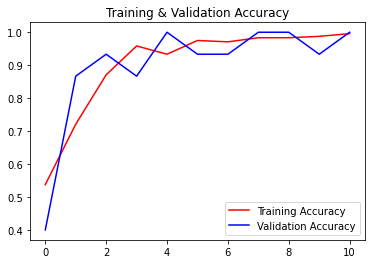

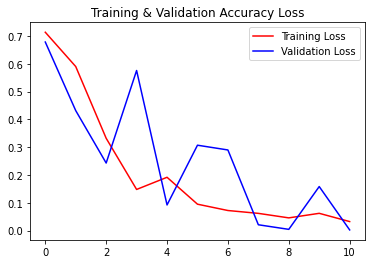

In [123]:
%matplotlib inline

# import matplotlib.image as matimg
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training & Validation Accuracy Loss')
plt.legend()
plt.show()


In [124]:
score_CNN = model.evaluate(val_generator)
print('Test Loss :', score_CNN[0])
print('Test Accuracy :', score_CNN[1])

12/12 [==============================] - 4s 284ms/step - loss: 0.0727 - accuracy: 0.9667
Test Loss : 0.07274101674556732
Test Accuracy : 0.9666666388511658


In [125]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import load_img, img_to_array

1/1 [==============================] - 0s 392ms/step
gambar ini masuk ke kelas Apel_busuk


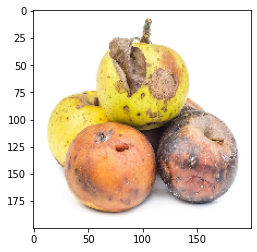

In [136]:
import cv2
import os
# image = cv2.imread('../testing/images2.jpg')
# image = cv2.resize(image, (100,100))
# image = np.reshape(image, (1, 100, 100, 3))

# prediksi = model.predict(image, batch_size = 100)
# print("Prediksi ", prediksi)



img = image.load_img('../testing/bosok.jpg', target_size = (200, 200))

imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

images = np.vstack([x])
prediksi = model.predict(images, batch_size = 100)


class_list1 = os.listdir('../dataset_fix_Apel/')

for j in range(42):
    if prediksi[0][j] == 1. :
      print('gambar ini masuk ke kelas', class_list1[j])
      break
#     else:
#       print('gambar ini masuk ke kelas', class_list1[j])
#       break
# # for i in range(42):
# #     if prediksi[0][i] == 0. :
# #       print('gambar ini masuk ke kelas', class_list1[i])
# #       break

# a = plt.imread('../testing/images2.jpg')
# plt.imshow(a)